In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from datetime import datetime,timedelta
from netCDF4 import Dataset
import cmocean as cm

In [19]:
data=Dataset('corspd.nc')
alldata=Dataset('ocm2.cdf')

In [4]:
alldata

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V7.42 (optimized) 24-May-19
    Conventions: CF-1.6
    dimensions(sizes): MX(49), MY(60), MT1(3120)
    variables(dimensions): float64 MX(MX), float64 MY(MY), float64 MT1(MT1), float64 U_OCM(MT1,MY,MX), float64 V_OCM(MT1,MY,MX), float64 SPD_OCM(MT1,MY,MX), float64 DIR_OCM(MT1,MY,MX)
    groups: 

In [5]:
u_ocm=alldata['U_OCM'][:,:,:].data
v_ocm=alldata['V_OCM'][:,:,:].data
dir_ocm=alldata['DIR_OCM'][:,:,:].data
spd_ocm=alldata['SPD_OCM'][:,:,:].data

In [6]:
dir_ocm[dir_ocm==-1.e+34]=np.nan
spd_ocm[spd_ocm==-1.e+34]=np.nan
dir_ocm[dir_ocm==-999]=np.nan
spd_ocm[spd_ocm==-999]=np.nan

In [7]:
toros=Dataset('tor2.cdf')

In [8]:
toros

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V7.42 (optimized) 24-May-19
    Conventions: CF-1.6
    dimensions(sizes): MX(49), MY(60), MT(3120)
    variables(dimensions): float64 MX(MX), float64 MY(MY), float64 MT(MT), float64 U_TOR(MT,MY,MX), float64 V_TOR(MT,MY,MX), float64 SPD_TOR(MT,MY,MX), float64 DIR_TOR(MT,MY,MX)
    groups: 

In [9]:
u_tor=toros['U_TOR'][:,:,:].data
v_tor=toros['V_TOR'][:,:,:].data
dir_tor=toros['DIR_TOR'][:,:,:].data
spd_tor=toros['SPD_TOR'][:,:,:].data

In [10]:
u_ocm[u_ocm==-1.e+34]=np.nan
v_ocm[v_ocm==-1.e+34]=np.nan
dir_ocm[dir_ocm==-1.e+34]=np.nan
spd_ocm[spd_ocm==-1.e+34]=np.nan


u_tor[u_tor==-999]=np.nan
v_tor[v_tor==-999]=np.nan
dir_tor[dir_tor==-999]=np.nan
spd_tor[spd_tor==-999]=np.nan

u_tor[u_tor==-1.e+34]=np.nan
v_tor[v_tor==-1.e+34]=np.nan
dir_tor[dir_tor==-1.e+34]=np.nan
spd_tor[spd_tor==-1.e+34]=np.nan


u_tor=u_tor[0:8736,:,:]
v_tor=v_tor[0:8736,:,:]
dir_tor=dir_tor[0:8736,:,:]
spd_tor=spd_tor[0:8736,:,:]
#u_tor=u_tor[0:8736,:,:]/100
#v_tor=v_tor[0:8736,:,:]/100
#dir_tor=dir_tor[0:8736,:,:]
#spd_tor=spd_tor[0:8736,:,:]/100

In [20]:
lon=data['MX2'][:]
lat=data['MY2'][:]

In [21]:
m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'

In [22]:
time=[0,31,59,90,120,151,181,212,243,273,304,334,362]
month=['01','02','03','04','05','06','07','08','09','10','11','12']
month_name=[]
month_name.append('Jan')
month_name.append('Feb')
month_name.append('Mar')
month_name.append('Apr')
month_name.append('May')
month_name.append('Jun')
month_name.append('Jul')
month_name.append('Aug')
month_name.append('Sep')
month_name.append('Oct')
month_name.append('Nov')
month_name.append('Dec')

# UV比對

Text(0,0.5,'Latitude')

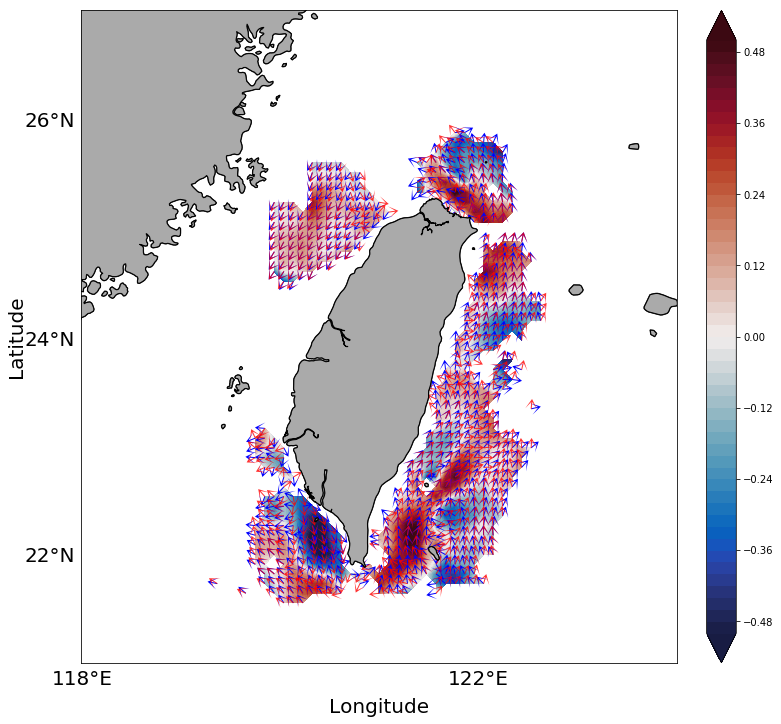

In [23]:
    time=0
    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'

    fig.set_size_inches(15, 12, forward=True)
    ax = plt.gca()


    x,y=np.meshgrid(lon,lat)
    x,y=m(x,y)
 
    uc_tor=u_tor[time,:,:].copy()
    vc_tor=v_tor[time,:,:].copy()
    sd_tor=(uc_tor**2+vc_tor**2)**0.5
    
    uc_ocm=u_ocm[time,:,:].copy()
    uc_ocm[np.isnan(uc_tor)]=np.nan
    vc_ocm=v_ocm[time,:,:].copy()
    vc_ocm[np.isnan(vc_tor)]=np.nan
    sd_ocm=(uc_ocm**2+vc_ocm**2)**0.5
    
    spd=sd_ocm-sd_tor
    cs=m.contourf(x,y,spd,np.linspace(-0.5,0.5,51),extend='both',cmap=cm.cm.balance)
#color bar  pad is distance in colobar to pic
    cbar = m.colorbar(cs, location='right', pad="5%")
    
    m.quiver(x, y,uc_ocm/sd_ocm, vc_ocm/sd_ocm,scale=60, headwidth=12,headlength=10,headaxislength=3,width=0.005,color='b')
    

    m.quiver(x, y,uc_tor/sd_tor, vc_tor/sd_tor,scale=60,headwidth=12,headlength=10,headaxislength=3,width=0.005,color='r',alpha=0.8)    
    
    
    
#color bar  pad is distance in colobar to pic
#    cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
#    cbar.ax.tick_params(labelsize=20)


    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')    
    
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))

        
####################       label   ################################################  
      
#make ylabel
    m.drawparallels(np.arange(16,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(110,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0)
        
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)   
#    fig.savefig(str(time+1)+'.png')

In [36]:
show=np.zeros((60,49))
ct=0
for i in range(60):
    for j in range(49):
        if(ct%2==0):
            show[i,j]=1
        ct=ct+1
            

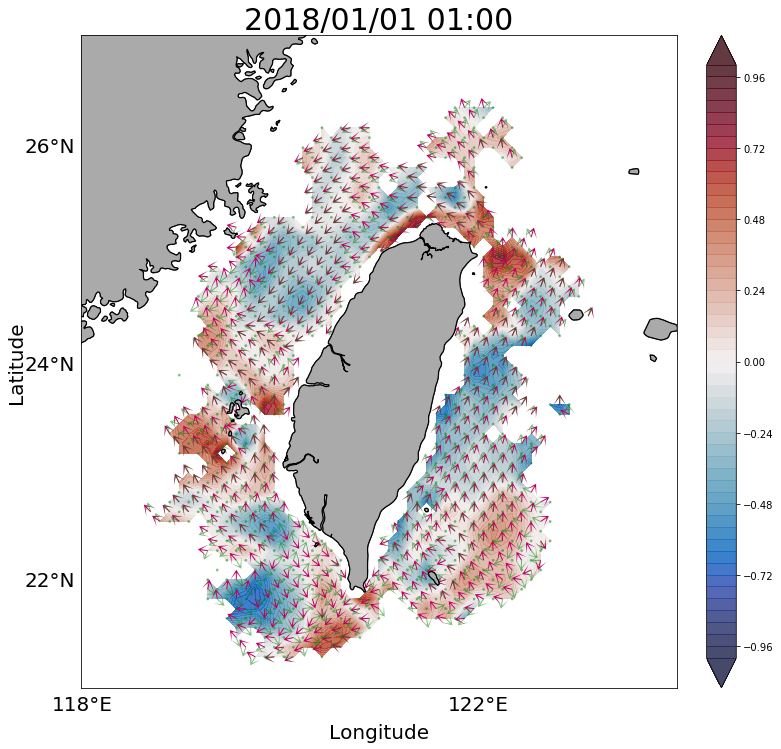

In [57]:
    time=0
    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'

    fig.set_size_inches(15, 12, forward=True)
    ax = plt.gca()


    x,y=np.meshgrid(lon,lat)
    x,y=m(x,y)
 
    uc_tor=u_tor[time,:,:].copy()
    vc_tor=v_tor[time,:,:].copy()

    
    uc_ocm=u_ocm[time,:,:].copy()
    vc_ocm=v_ocm[time,:,:].copy()
    
    sd_tor=(uc_tor**2+vc_tor**2)**0.5
    sd_ocm=(uc_ocm**2+vc_ocm**2)**0.5
    
    # mk smmoth
    uc_tor[show==0]=0
    vc_tor[show==0]=0    
    uc_ocm[ (uc_tor==0) | (np.isnan(uc_tor))  ]=np.nan
    vc_ocm[ (vc_tor==0) | (np.isnan(vc_tor))  ]=np.nan
    

    
    spd=sd_ocm-sd_tor
    cs=m.contourf(x,y,spd,np.linspace(-1,1,51),extend='both',cmap=cm.cm.balance,alpha=0.8)
#color bar  pad is distance in colobar to pic
    cbar = m.colorbar(cs, location='right', pad="5%")
    
    m.quiver(x, y,uc_ocm/sd_ocm, vc_ocm/sd_ocm,scale=60, headwidth=12,headlength=10,headaxislength=3,width=0.005,color=['#bf0060'])
    m.quiver(x, y,uc_tor/sd_tor, vc_tor/sd_tor,scale=60,headwidth=12,headlength=10,headaxislength=3,width=0.005,color='g',alpha=0.5)    
    
    

    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')    
    
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))

        
####################       label   ################################################  
      
#make ylabel
    m.drawparallels(np.arange(16,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(110,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0)
        
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)   
    plt.title('2018/01/01 01:00',fontsize=30) 
    fig.savefig('uv_compare.png')

# 月平均

In [ ]:
def avg(array,t1,t2):
    avg=np.nanmean(array[t1:t2,:,:],axis=0)
    return avg

In [ ]:
show=np.zeros((60,49))
ct=0
for i in range(60):
    for j in range(49):
        if(ct%3==0):
            show[i,j]=1
        ct=ct+1
            

In [ ]:
    st=0
    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'

    fig.set_size_inches(15, 12, forward=True)
    ax = plt.gca()


    x,y=np.meshgrid(lon,lat)
    x,y=m(x,y)
 

    uc_tor=avg(u_tor,0,744)
    vc_tor=avg(v_tor,0,744)
    uc_ocm=avg(u_ocm,0,744)
    vc_ocm=avg(v_ocm,0,744)
        
    
    # mk smmoth
    uc_tor[show==0]=np.nan
    vc_tor[show==0]=np.nan
    uc_ocm[ (uc_tor==0) | (np.isnan(uc_tor))  ]=np.nan
    vc_ocm[ (vc_tor==0) | (np.isnan(vc_tor))  ]=np.nan
    
    
    
    
    sd_tor=(uc_tor**2+vc_tor**2)**0.5
    sd_ocm=(uc_ocm**2+vc_ocm**2)**0.5
    m.quiver(x, y,uc_ocm/sd_ocm, vc_ocm/sd_ocm,scale=40, headwidth=10,headlength=10,headaxislength=4,width=0.009,color='b')
    

    m.quiver(x, y,uc_tor/sd_tor, vc_tor/sd_tor,scale=40, headwidth=10,headlength=10,headaxislength=4,width=0.009,color='r',alpha=0.7)    
    
    
    
#color bar  pad is distance in colobar to pic
#    cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
#    cbar.ax.tick_params(labelsize=20)


    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')    
    
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))

        
####################       label   ################################################  
      
#make ylabel
    m.drawparallels(np.arange(16,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(110,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0)
        
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)   
    fig.savefig(month[st]+'.png')

# 相差

In [28]:
u_dif=u_ocm-u_tor
v_dif=v_ocm-v_tor

In [29]:
def avg(array,t1,t2):
    avg=np.nanmean(array[t1:t2,:,:],axis=0)
    return avg

In [30]:
time=[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 362]

In [31]:
month=['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


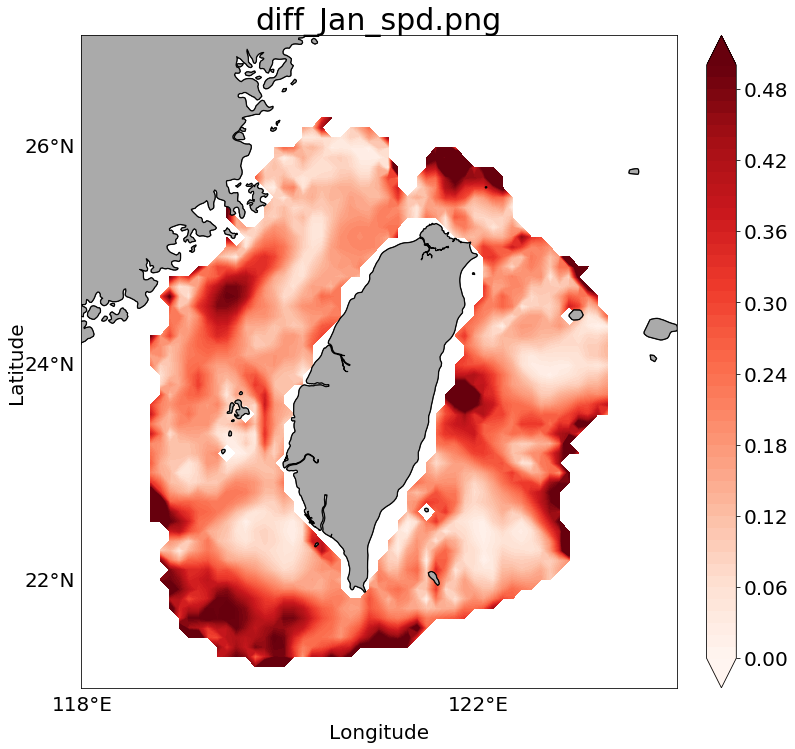

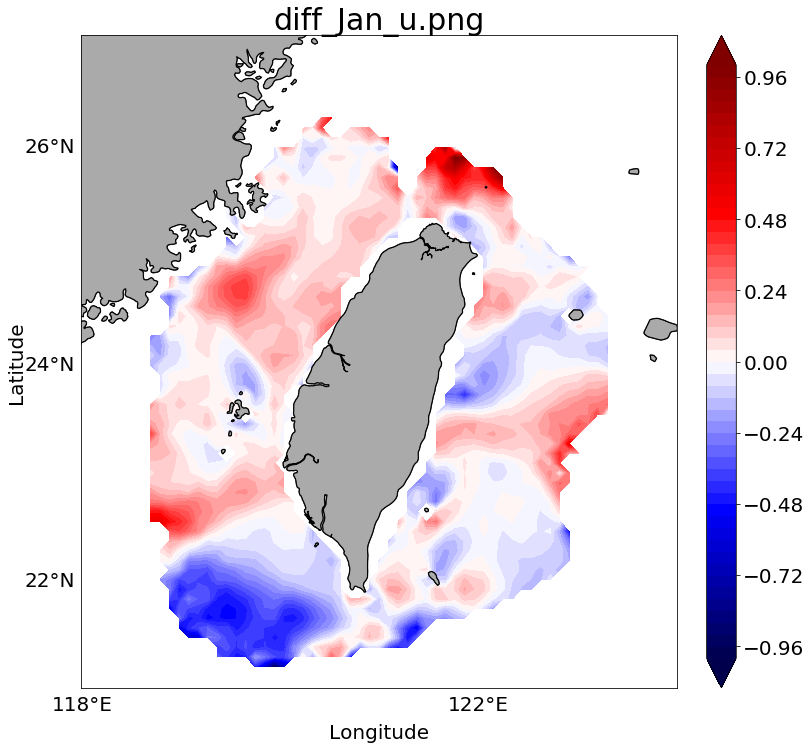

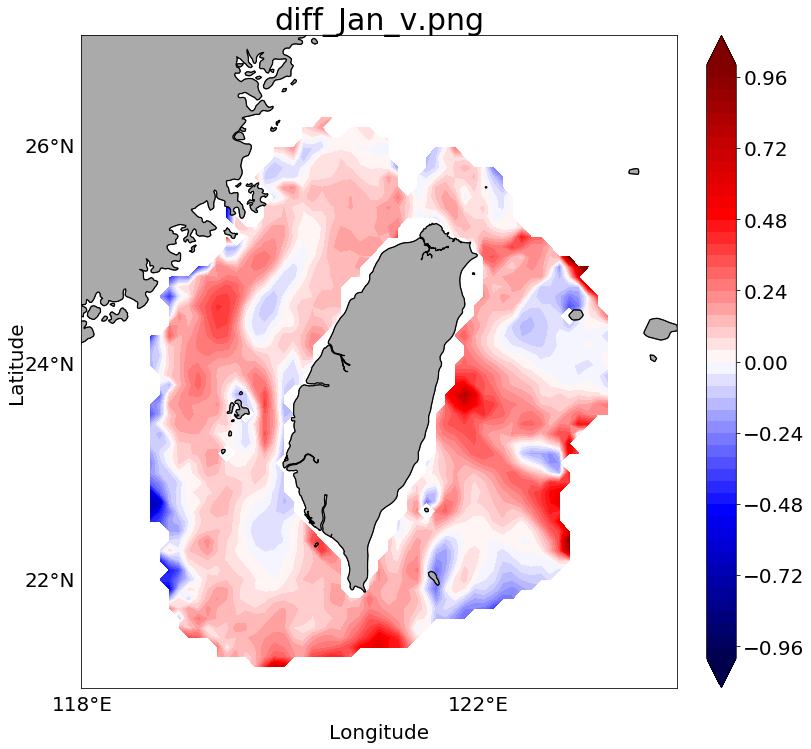

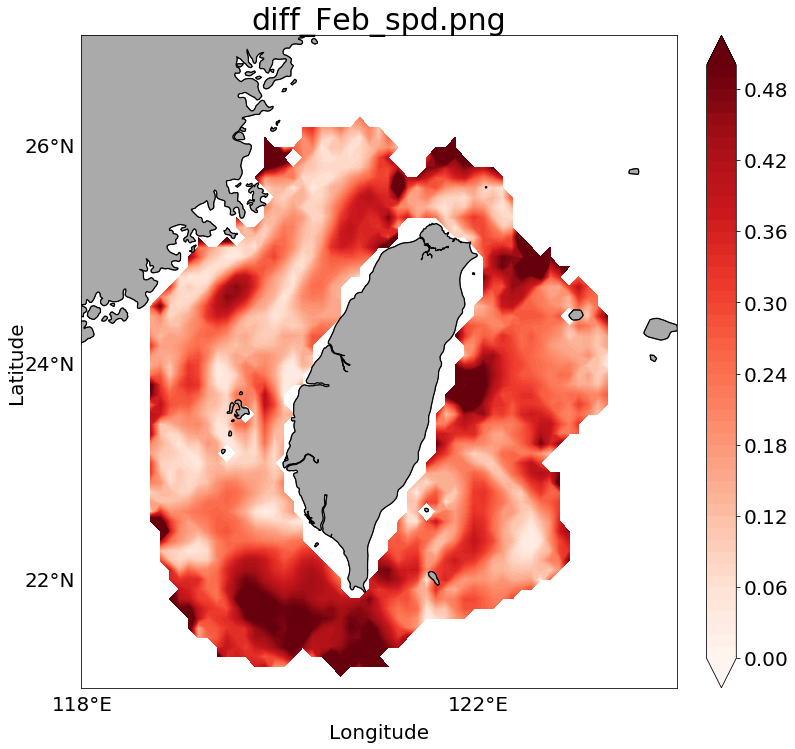

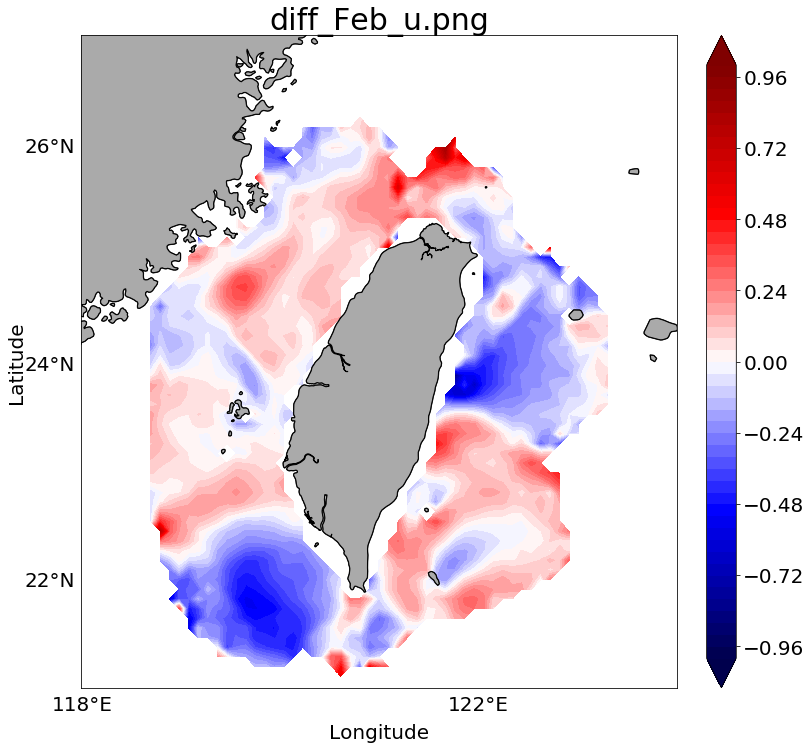

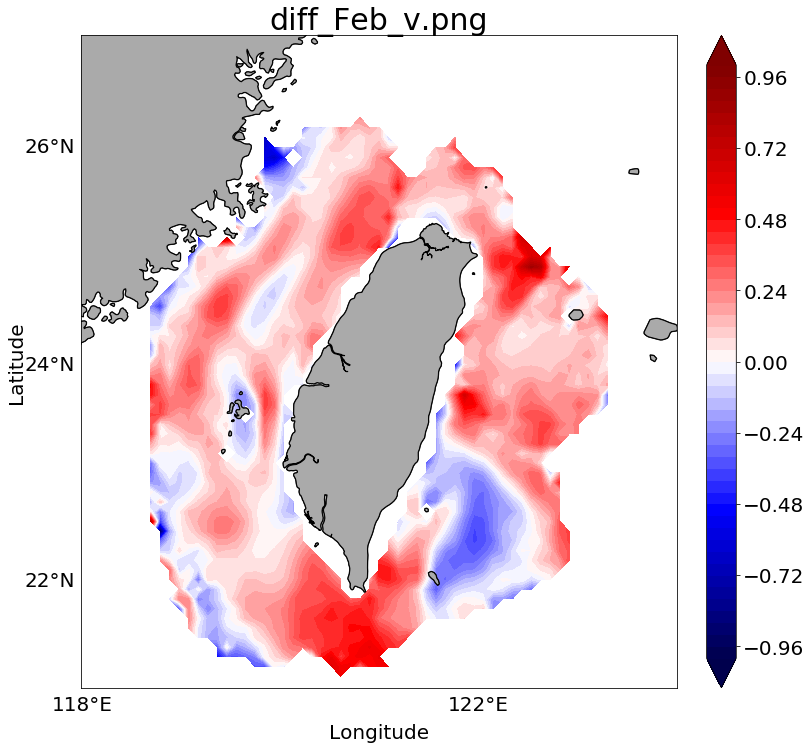

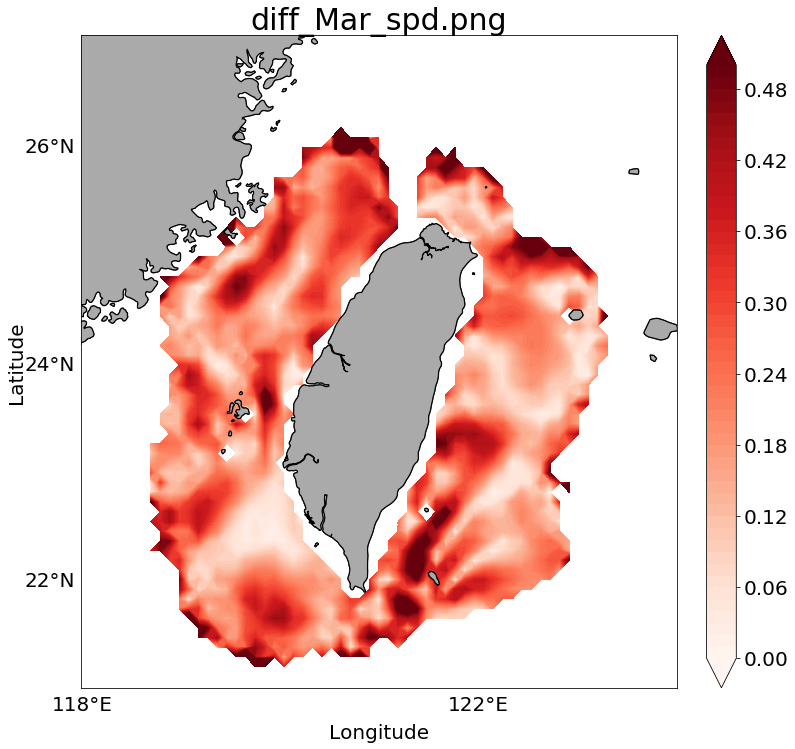

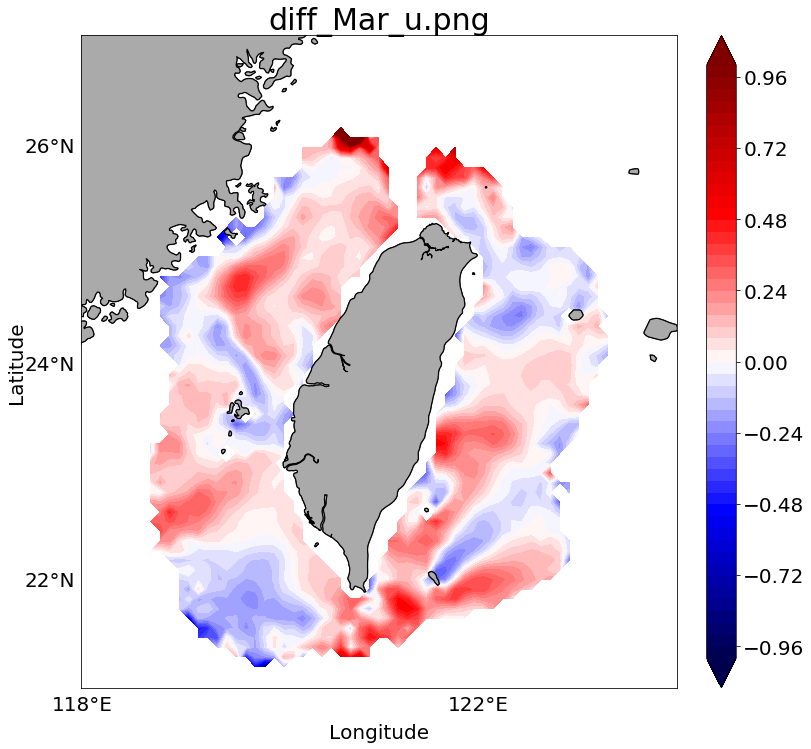

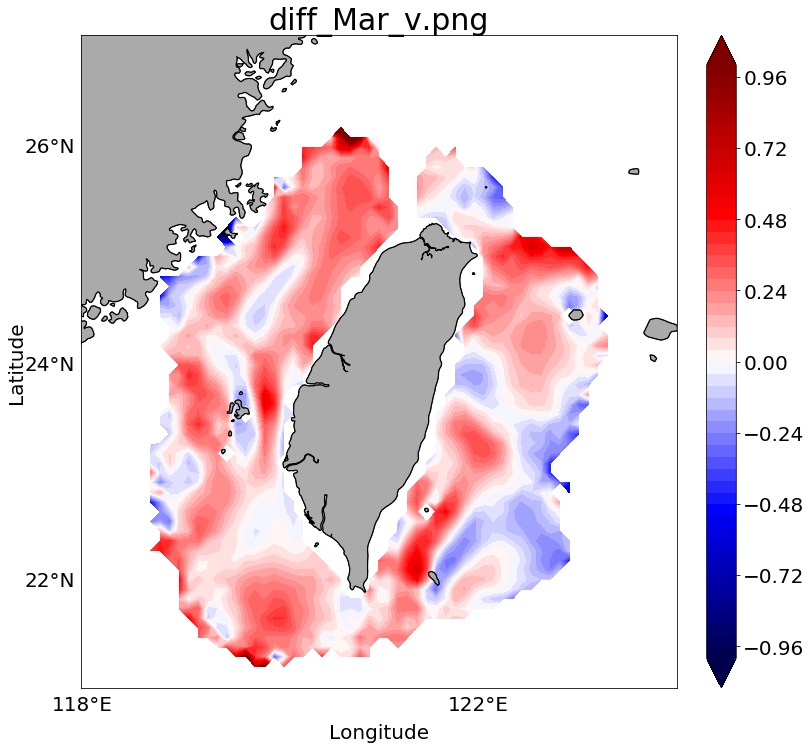

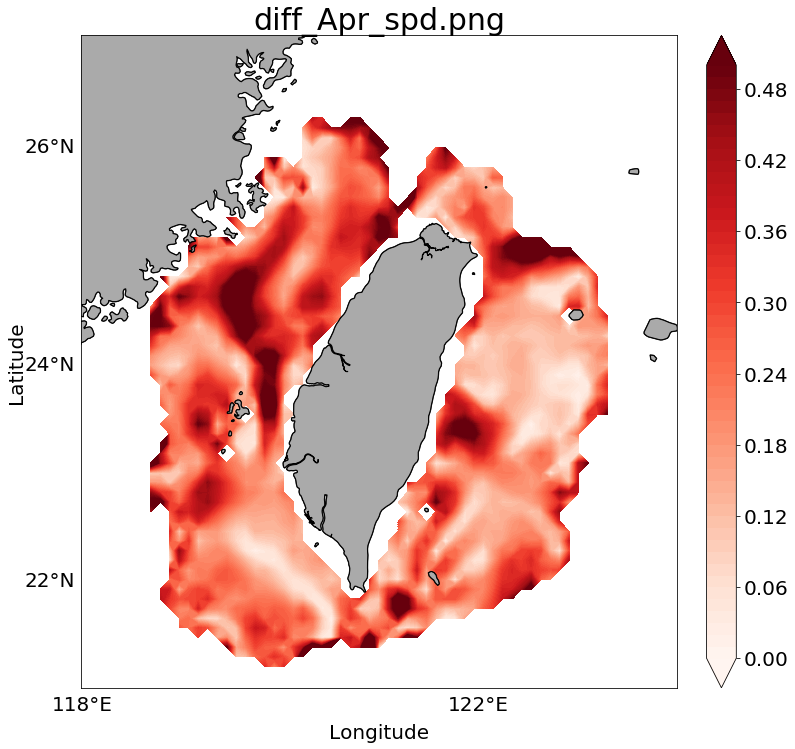

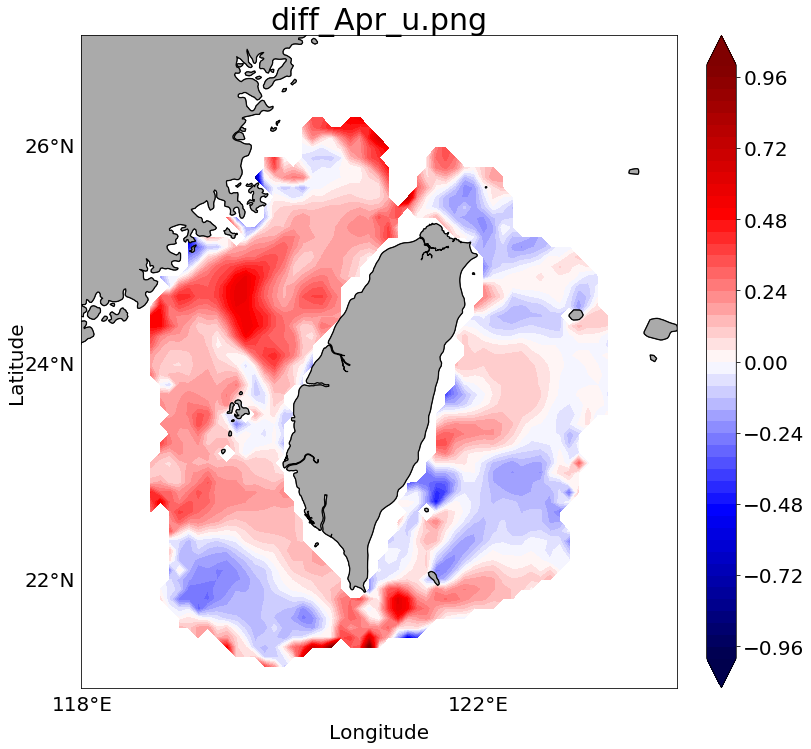

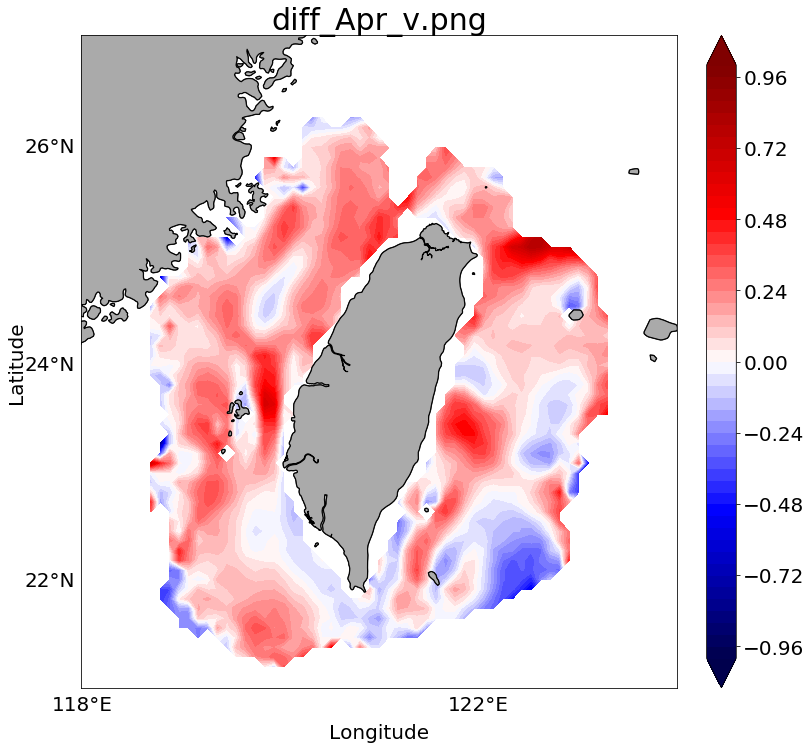

In [32]:
for st in range(4):
    u_dif=u_ocm-u_tor
    v_dif=v_ocm-v_tor

    x,y=np.meshgrid(lon,lat)
    x,y=m(x,y)
 
      
    #Get diff average
    uc_dif=avg(u_dif,time[st]*24,time[st+1]*24)
    vc_dif=avg(v_dif,time[st]*24,time[st+1]*24)
    
    # mk smmoth
#    uc_dif[show==0]=np.nan
#    vc_dif[show==0]=np.nan

    
##############################################################################################################    
    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'
    fig.set_size_inches(15, 12, forward=True)
    ax = plt.gca()
        
    sd_dif=(uc_dif**2+vc_dif**2)**0.5

    cs=m.contourf(x,y,sd_dif,np.linspace(0,0.5,51),extend='both',cmap='Reds')
#color bar  pad is distance in colobar to pic
    cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
    cbar.ax.tick_params(labelsize=20)
    

#    m.quiver(x, y,uc_dif, vc_dif,scale=1500, headwidth=12,headlength=10,headaxislength=3,width=0.005,color='k')
    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')        
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))
        
####################       label   ################################################     
#make ylabel
    m.drawparallels(np.arange(16,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(110,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0)   
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)   
    plt.title('diff_'+month[st]+'_spd.png',fontsize=30)
    fig.savefig('diff_'+month[st]+'_spd_diff'+'.png')
    
    
##############################################################################################################    
    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'
    fig.set_size_inches(15, 12, forward=True)
    ax = plt.gca()
        
    cs=m.contourf(x,y,uc_dif,np.linspace(-1,1,51),extend='both',cmap='seismic')
#color bar  pad is distance in colobar to pic
    cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
    cbar.ax.tick_params(labelsize=20)
    
    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')        
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))
        
####################       label   ################################################     
#make ylabel
    m.drawparallels(np.arange(16,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(110,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0)   
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)
    plt.title('diff_'+month[st]+'_u.png',fontsize=30)
    fig.savefig('diff_'+month[st]+'_u_diff'+'.png')    
    
    
##############################################################################################################    
    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'
    fig.set_size_inches(15, 12, forward=True)
    ax = plt.gca()
        
    cs=m.contourf(x,y,vc_dif,np.linspace(-1,1,51),extend='both',cmap='seismic')
#color bar  pad is distance in colobar to pic
    cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
    cbar.ax.tick_params(labelsize=20)
    
    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')        
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))
        
####################       label   ################################################     
#make ylabel
    m.drawparallels(np.arange(16,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(110,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0)   
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)
    plt.title('diff_'+month[st]+'_v.png',fontsize=30)
    fig.savefig('diff_'+month[st]+'_v_diff'+'.png')    

# 月平均 相關性分析

In [33]:
from scipy.stats.stats import pearsonr 

In [38]:
def pear_avg(array1,array2,t1,t2):
    a=array1[t1:t2,:,:]
    b=array2[t1:t2,:,:]
    cor=np.zeros((60,49))
    sd=np.zeros((60,49))
    for i in range(60):
        for j in range(49):
            bad = ~np.logical_or(np.isnan(a[:,i,j]), np.isnan(b[:,i,j]))
            x=np.compress(bad, a[:,i,j])
            y=np.compress(bad, b[:,i,j])
            x[(x>=300) & (y<=60)]=x[(x>=300) & (y<=60)]-360
            y[(y>=300) & (x<=60)]=y[(y>=300) & (x<=60)]-360
            cor[i,j]=pearsonr(x,y)[0]
    return cor

In [ ]:
1  31   0      744
2  59   744    1416
3  90   1416   2160
4  120  2160   2880
5  151  2880   3624
6  181  3624   4344
7  212  4344   5088
8  243  5088   5832
9  273  5832   6552
10 304  6552   7296
11 334  7296   8016
12 365  8016   8760

In [20]:
test2[test2>=0.7]=1
test2[(test2>=0.3) &  (test2<=0.7)]=0.5
test2[(test2<=0.3) &  (test2>=0)]=0

NameError: name 'test2' is not defined

# 季節平均 相關性分析

In [95]:
from scipy.stats.stats import pearsonr 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3005: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3006: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3020: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWar

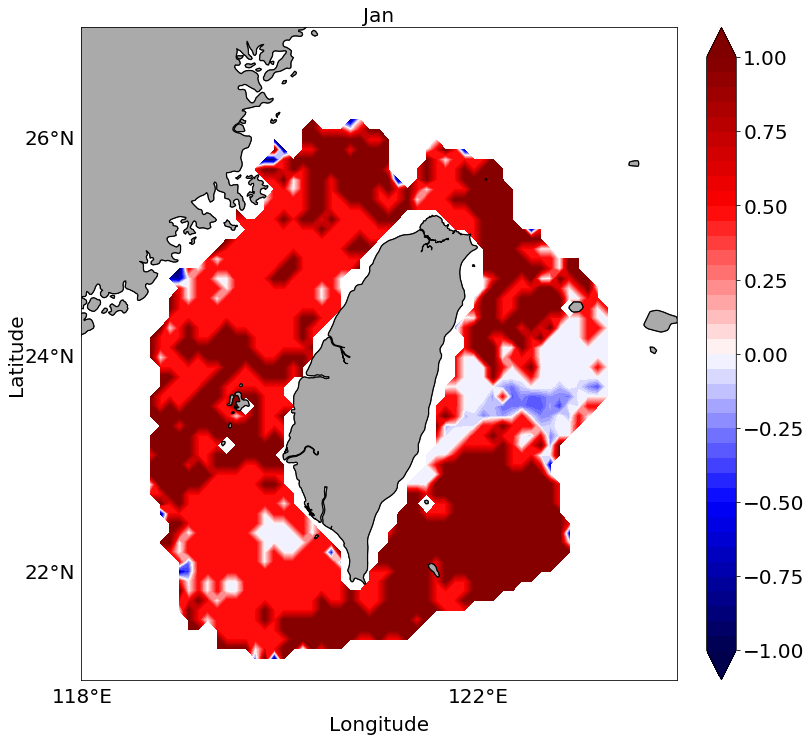

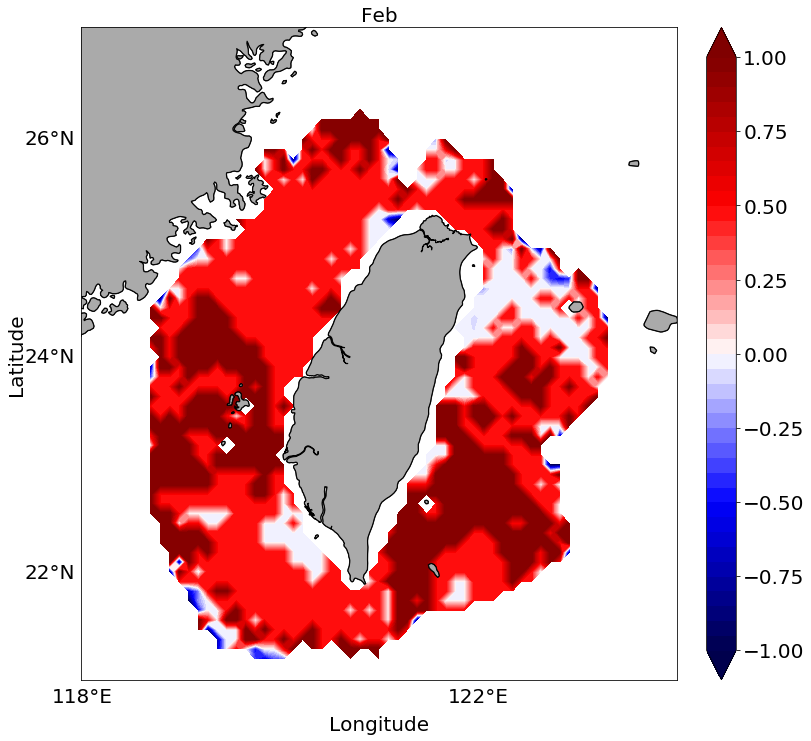

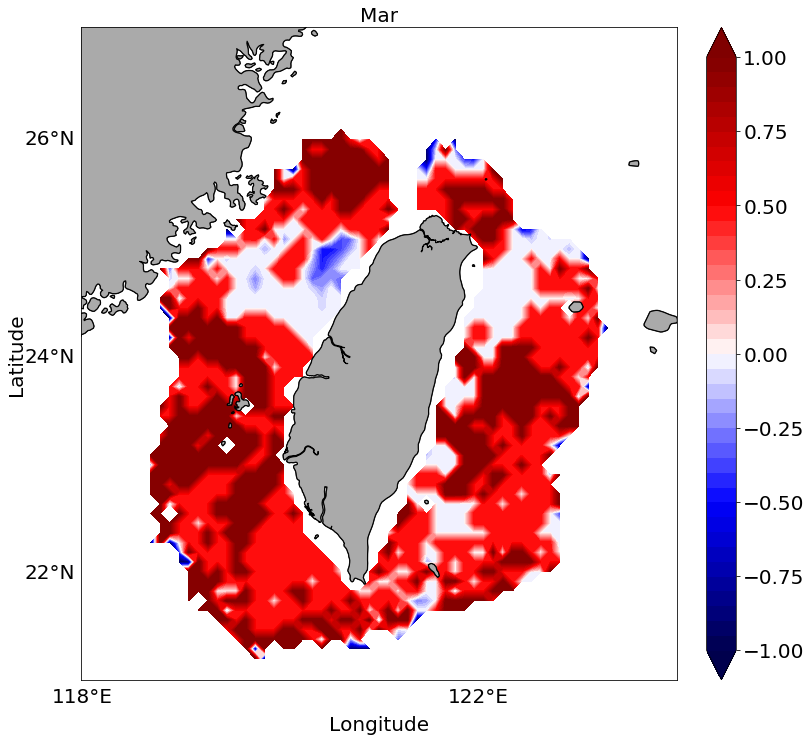

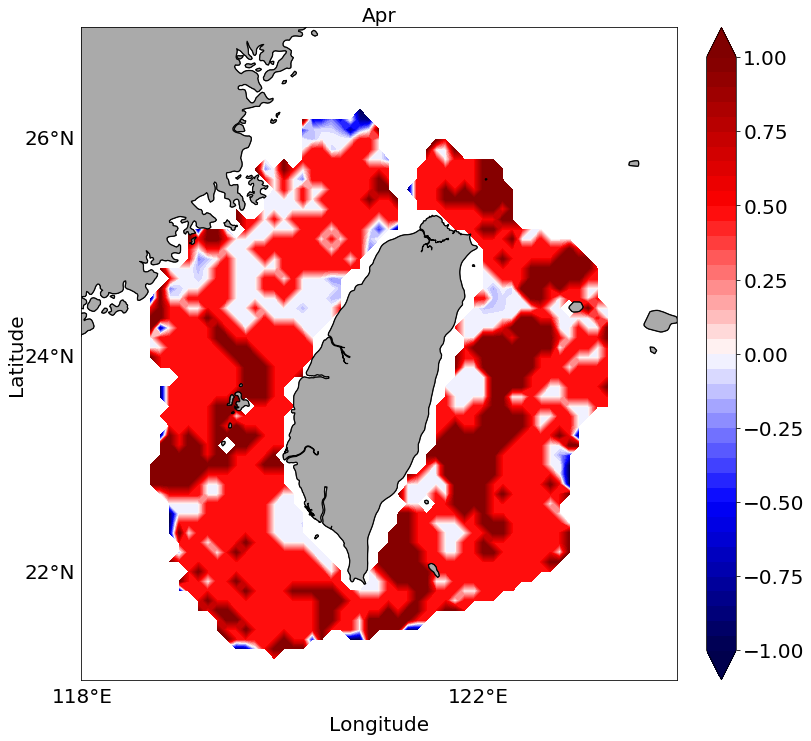

In [40]:
for st in range(4):
    test2=pear_avg(dir_ocm,dir_tor,time[st]*24,time[st+1]*24)
    test2[test2>=0.7]=1
    test2[(test2>=0.3) &  (test2<=0.7)]=0.5
    test2[(test2<=0.3) &  (test2>=0)]=0
    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'
    fig.set_size_inches(15, 12, forward=True)
    ax = plt.gca()
    x,y=np.meshgrid(lon,lat)
    x,y=m(x,y)
    cs=m.contourf(x,y,test2,np.linspace(-1,1,41),extend='both',cmap='seismic')
#color bar  pad is distance in colobar to pic
    cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
    cbar.ax.tick_params(labelsize=20)


    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')    
    
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))

        
####################       label   ################################################  
      
#make ylabel
    m.drawparallels(np.arange(16,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(110,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0) 
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)  
    plt.title(month[st],fontsize=20)
    fig.savefig('cor/cor_dir_'+month[st]+'.png')

In [ ]:
for st in range(4):
    test2=pear_avg(spd_ocm,spd_tor,time[st]*24,time[st+1]*24)
    test2[test2>=0.7]=1
    test2[(test2>=0.3) &  (test2<=0.7)]=0.5
    test2[(test2<=0.3) &  (test2>=0)]=0
    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=21,urcrnrlat=27,\
            llcrnrlon=118,urcrnrlon=124) #resolution='h'
    fig.set_size_inches(15, 12, forward=True)
    ax = plt.gca()
    x,y=np.meshgrid(lon,lat)
    x,y=m(x,y)
    cs=m.contourf(x,y,test2,np.linspace(-1,1,41),extend='both',cmap='seismic')
#color bar  pad is distance in colobar to pic
    cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
    cbar.ax.tick_params(labelsize=20)


    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')    
    
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))

        
####################       label   ################################################  
      
#make ylabel
    m.drawparallels(np.arange(16,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(110,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0) 
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)  
    plt.title(month[st],fontsize=20)
    fig.savefig('cor/cor_spd_'+month[st]+'.png')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3005: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3006: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3020: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWar

In [ ]:
test2=pear_avg(dir_ocm,dir_tor,time[st]*24,time[st+1]*24)

In [17]:

import seaborn as sns

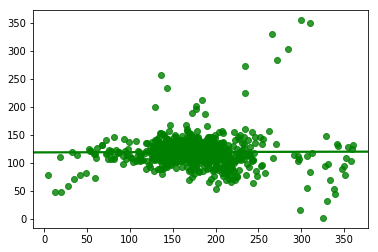

In [38]:

sns.regplot(x=a[:,14,14], y=b[:,14,14], color="g",ci=None)

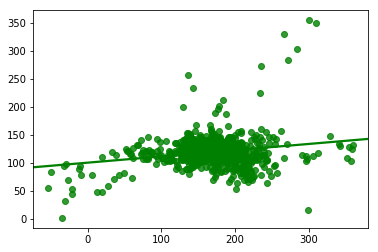

In [34]:
bad = ~np.logical_or(np.isnan(a[:,14,14]), np.isnan(b[:,14,14]))
x=np.compress(bad, a[:,14,14])
y=np.compress(bad, b[:,14,14])
x[(x>=300) & (y<=100)]=x[(x>=300) & (y<=100)]-360
y[(y>=300)&(x<=100)]=y[(y>=300)&(x<=100)]-360
sns.regplot(x=x, y=y, color="g",ci=None)

In [36]:
pearsonr(x,y)[0]

0.20460754387332877

In [ ]:
import seaborn as sns

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 4, forward=True)
sns.regplot(x=dir_ocm[0:744,35,40], y=dir_tor[0:744,35,40], color="g",ci=None)
plt.savefig('out.png')

In [ ]:

bad = ~np.logical_or(np.isnan(dir_ocm[0:744,35,40]), np.isnan(dir_tor[0:744,35,40]))
x=np.compress(bad, dir_ocm[0:744,35,40])
y=np.compress(bad, dir_tor[0:744,35,40])
pearsonr(x,y)[0]

In [ ]:
bad = ~np.logical_or(np.isnan(dir_ocm[0:744,35,40]), np.isnan(dir_tor[0:744,35,40]))
x=np.compress(bad, dir_ocm[0:744,35,40])
y=np.compress(bad, dir_tor[0:744,35,40])

In [ ]:
x[(x>=300) & (y<=100)]=x[(x>=300) & (y<=100)]-360
y[(y>=300)&(x<=100)]=y[(y>=300)&(x<=100)]-360

In [ ]:
pearsonr(x,y)[0]

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 4, forward=True)
sns.regplot(x=x, y=y, color="g",ci=None)
plt.savefig('in.png')